# Selection algorithms

In [1]:
# Community simulator package
from IPython.display import Image
from community_simulator import *
from community_simulator.usertools import *
from community_simulator.visualization import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends import backend_pdf as bpdf
import numpy as np
import scipy as sp
colors = sns.color_palette()
%matplotlib inline

# Community selection package
from community_selection import *
from community_selection.A_experiment_functions import *
from community_selection.B_community_phenotypes import *
from community_selection.C_selection_algorithms import *
from community_selection.D_migration_algorithms import *

In [2]:
make_algorithm_library()

,AlgorithmType,AlgorithmName
0,community_phenotype,f1_additive
1,community_phenotype,f2_interaction
2,community_phenotype,f3_additive_binary
3,community_phenotype,f4_interaction_binary
4,community_phenotype,f5_invasion_growth
5,community_phenotype,f6_resident_growth
0,selection_algorithm,no_selection
1,selection_algorithm,select_top25percent
2,selection_algorithm,select_top10percent
3,selection_algorithm,select_bottom25percent


In [3]:
# Make dynanmics by default we will use the microbial consumer resource model
def dNdt(N,R,params):
    return MakeConsumerDynamics(assumptions)(N,R,params)
def dRdt(N,R,params):
    return MakeResourceDynamics(assumptions)(N,R,params)
dynamics = [dNdt,dRdt]

# Global parameters
## Default parameters from community-simulator
## !!!Don't touch this dictionary!!!
assumptions = a_default.copy() # Start with default parameters
a_default = {'sampling':'Binary', #{'Gaussian','Binary','Gamma'} specifies choice of sampling algorithm
            'SA': 60*np.ones(3), #Number of species in each specialist family (here, 3 families of 60 species)
            'MA': 30*np.ones(3), #Number of resources in each class 
            'Sgen': 30, #Number of generalist species (unbiased sampling over alll resource classes)
            'muc': 10, #Mean sum of consumption rates (used in all models)
            'sigc': 3, #Standard deviation of sum of consumption rates for Gaussian and Gamma models
            'q': 0.0, #Preference strength of specialist families (0 for generalist and 1 for specialist)
            'c0':0.0, #Sum of background consumption rates in binary model
            'c1':1., #Specific consumption rate in binary model
            'l':0.8, #Leakage fraction
            'fs':0.45, #Fraction of secretion flux with same resource type
            'fw':0.45, #Fraction of secretion flux to 'waste' resource
            'sparsity':0.2, #Effective sparsity of metabolic matrix (between 0 and 1)
            'n_wells':10, #Number of independent wells
            'S':100, #Number of species per well (randomly sampled from the pool of size Stot = sum(SA) + Sgen)
            'food':0, #index of food source (when a single resource is supplied externally)
            'R0_food':1000, #unperturbed fixed point for supplied food
            'regulation':'independent', #metabolic regulation (see dRdt)
            'response':'type I', #functional response (see dRdt)
            'supply':'off' #resource supply (see dRdt)
            }

## Update parameters for community-selection
assumptions.update({
    'SA': 60*np.ones(3), #Number of species in each specialist family (here, 3 families of 60 species)
    'MA': 30*np.ones(3), #Number of resources in each class 
    'Sgen': 30, #Number of generalist species (unbiased sampling over alll resource classes)
    "n_wells": 24,
    "c1": 1, #Rescale uptake rate part 1. This is needed to avoid numerical errors that slow down the simulations
    "muc": 10, # Rescale uptake part 2
    "m": 0, # Mortality
    "scale": 10**9,  #scale is a conversion factor specifying the number of individual microbial cells present when N = 1.
    "sigma" : 1, # Standard deviation for drawing specifc speices/interaction function
    "alpha": 1, # Scaling factor between species- and interaction-specific function variances
    "response": "type III",
    "sigma_max": 1000, # 
    'R0_food':1000 #unperturbed fixed point for supplied food
})



# Prepare experiment setup in this universe
params, species_pool, species_function, interaction_function = prepare_experiment(assumptions, seed = 1)

## Simulation parameters
params_simulation = {
    "n_propagation": 8, # Length of propagation, or hours within a growth cycle
    "n_transfer": 20, # Number of transfer, or number of passage
    "dilution": 1/125, # Dilution factor at every transfer
    "n_inoc": 128,  #Number of cells sampled from the regional species at start
    "pool": species_pool, 
    "species_function": species_function,
    "interaction_function": interaction_function,
    "selected_function": "f1_additive"
}

# Transfer matrices

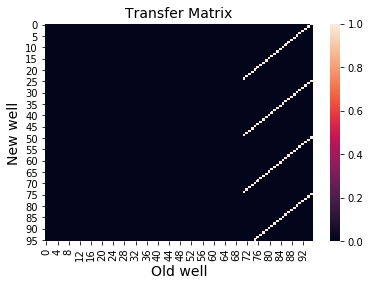

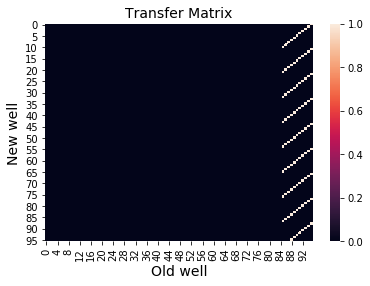

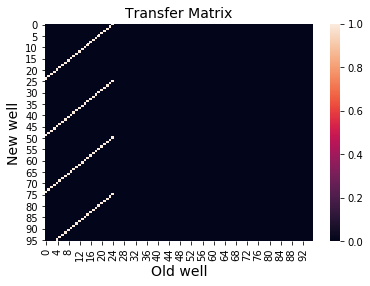

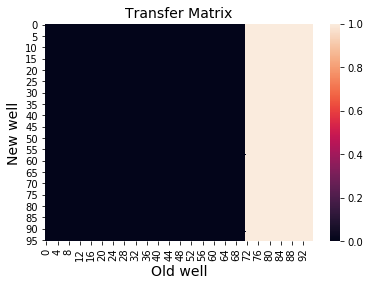

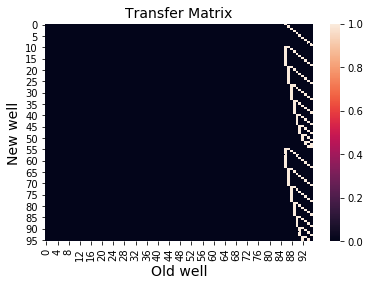

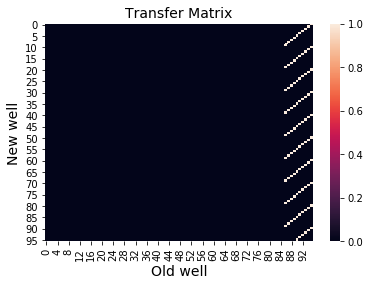

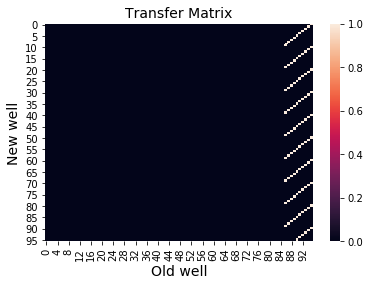

In [4]:
community_function = range(96)
plot_transfer_matrix(select_top25percent(community_function))
plot_transfer_matrix(select_top10percent(community_function))
plot_transfer_matrix(select_bottom25percent(community_function))
plot_transfer_matrix(pool_top25percent(community_function))
plot_transfer_matrix(pair_top(community_function))
plot_transfer_matrix(direct_selection_select(community_function))

In [5]:
community_function = range(24)

# Save the transfer matrix
pd.DataFrame(select_top25percent(community_function)).to_csv("data/transfer_matrix-select_top25percent.txt", index = False)
pd.DataFrame(select_top10percent(community_function)).to_csv("data/transfer_matrix-select_top10percent.txt", index = False)
pd.DataFrame(select_bottom25percent(community_function)).to_csv("data/transfer_matrix-select_bottom25percent.txt", index = False)
pd.DataFrame(pool_top25percent(community_function)).to_csv("data/transfer_matrix-pool_top25percent.txt", index = False)
pd.DataFrame(pair_top(community_function)).to_csv("data/transfer_matrix-pair_top.txt", index = False)
pd.DataFrame(direct_selection_select(community_function)).to_csv("data/transfer_matrix-direct_selection_select.txt", index = False)

# Selection algorithms

Each of the selection algorithms have the following sequences of algorithms:

- community_phenotype (community function of interest, eq, additive, interative function, etc...)
- selection_algorithm (transfer matrix)
- migration_algorithm (migration from species pool to the plates)

The lengh of each algorithm list must have the same number of experimental transfers

In [ ]:
# Save the algorithms
algorithms = make_algorithms(params_simulation)
algorithms.to_csv("algorithm/algorithms.txt", index = False)